In [1]:
# pandas - numpy - matplotlib - seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Abdallah\python project\customer_data.csv')

In [3]:
# Explore Data

In [4]:
print(df.head())
print(df.tail())

  CustomerID           Name   Age  Gender                      Email  \
0   CUST1000     Ali Hassan  72.0     NaN       ali.hassan@gmail.com   
1   CUST1001      Fatma Ali   NaN  Female      fatma.ali@hotmail.com   
2   CUST1002  Ahmed Mahmoud  -1.0    male  ahmed.mahmoud@hotmail.com   
3   CUST1003    Ahmed Gaber  -1.0       F      ahmed.gaber@gmail.com   
4   CUST1004    Ali Ibrahim  73.0       M      ali.ibrahim@yahoo.com   

         Phone  PurchaseAmount PurchaseDate ProductCategory  Rating  Unnamed  \
0  123456789.0          837.31   2023-10-12           Books     3.0      NaN   
1          NaN          900.25   2023-02-23             NaN     3.0      NaN   
2          NaN          761.72   2023-07-07            Toys     2.0      NaN   
3          NaN          303.72   2023-12-30             NaN     2.0      NaN   
4  987654321.0          635.81   2023-12-07        Clothing     2.0      NaN   

    Gender    
0        NaN  
1     Female  
2       male  
3          F  
4          

In [5]:
print(df.shape)        
df.columns
df.info()

(2150, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   object 
 1   Name             2150 non-null   object 
 2   Age              1630 non-null   float64
 3   Gender           1877 non-null   object 
 4   Email            2150 non-null   object 
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   object 
 8   ProductCategory  1573 non-null   object 
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   object 
dtypes: float64(5), object(7)
memory usage: 201.7+ KB


In [8]:
df.duplicated().sum()
df.nunique()
df.isna().sum()
df.describe()

,Age,Phone,PurchaseAmount,Rating,Unnamed
count,1630.000000,1.072000e+03,2049.000000,1821.000000,0.0
mean,85.180982,5.668417e+08,509.418882,4.183416,NaN
std,86.794111,4.321530e+08,288.257697,2.871300,NaN
min,-1.000000,1.234568e+08,5.060000,1.000000,NaN
25%,-1.000000,1.234568e+08,263.680000,2.000000,NaN
50%,54.000000,9.876543e+08,519.250000,3.000000,NaN
75%,200.000000,9.876543e+08,762.910000,5.000000,NaN
max,200.000000,9.876543e+08,999.560000,10.000000,NaN


In [9]:
# Clean Data

In [10]:
df = df.drop(columns=['Unnamed', '  Gender  '])  
print(df.head())                             
print(df.head(3))

  CustomerID           Name   Age  Gender                      Email  \
0   CUST1000     Ali Hassan  72.0     NaN       ali.hassan@gmail.com   
1   CUST1001      Fatma Ali   NaN  Female      fatma.ali@hotmail.com   
2   CUST1002  Ahmed Mahmoud  -1.0    male  ahmed.mahmoud@hotmail.com   
3   CUST1003    Ahmed Gaber  -1.0       F      ahmed.gaber@gmail.com   
4   CUST1004    Ali Ibrahim  73.0       M      ali.ibrahim@yahoo.com   

         Phone  PurchaseAmount PurchaseDate ProductCategory  Rating  
0  123456789.0          837.31   2023-10-12           Books     3.0  
1          NaN          900.25   2023-02-23             NaN     3.0  
2          NaN          761.72   2023-07-07            Toys     2.0  
3          NaN          303.72   2023-12-30             NaN     2.0  
4  987654321.0          635.81   2023-12-07        Clothing     2.0  
  CustomerID           Name   Age  Gender                      Email  \
0   CUST1000     Ali Hassan  72.0     NaN       ali.hassan@gmail.com   
1  

In [13]:
df['Add'] = 1       
df['Add']

0       1
1       1
2       1
3       1
4       1
       ..
2145    1
2146    1
2147    1
2148    1
2149    1
Name: Add, Length: 2150, dtype: int64

In [14]:
df=df.drop_duplicates()
print(df.shape)
print(df['Gender'].unique())

(2100, 11)
[nan 'Female' 'male' 'F' 'M' 'female' 'Male']


In [19]:
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Gender'] = df['Gender'].replace({'m': 'male', 'f': 'female'})
df['Gender'] = df['Gender'].fillna('male')

In [21]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)
df['ProductCategory']=df['ProductCategory'].fillna('Unknown')
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'],errors='coerce')
df['Age']=df['Age'].apply(lambda x:df['Age'].mean() if x<0 else x)
df=df.dropna()

In [22]:
# Data Analysis

In [23]:
(df.sort_values(by=['PurchaseAmount','Rating'],ascending=False).head(10))
df['ProductCategory'].value_counts()
df['Rating'].value_counts().sort_index()
gender_counts=df['Gender'].value_counts()
gender_counts

Gender
male      480
female    331
Name: count, dtype: int64

In [24]:
# Exploratory Data Analysis (EDA) – Visualization

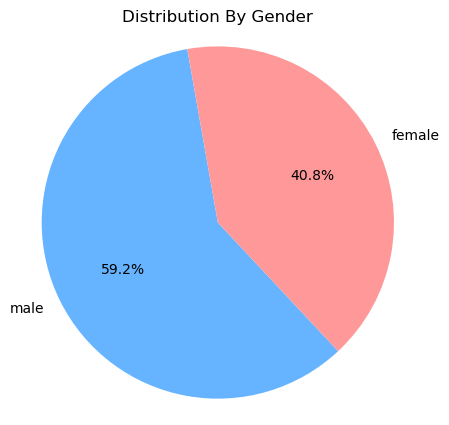

In [34]:
plt.figure(figsize=(5,5))
colors = ['#66b3ff', '#ff9999']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=100, colors=colors)
plt.title('Distribution By Gender')
plt.axis('equal')
plt.show()

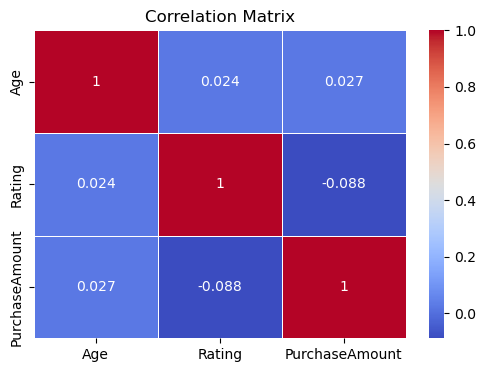

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

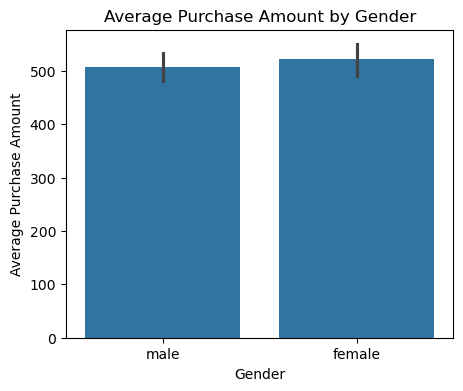

In [40]:
plt.figure(figsize=(5,4))
sns.barplot(data=df,x='Gender',y='PurchaseAmount',estimator='mean')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

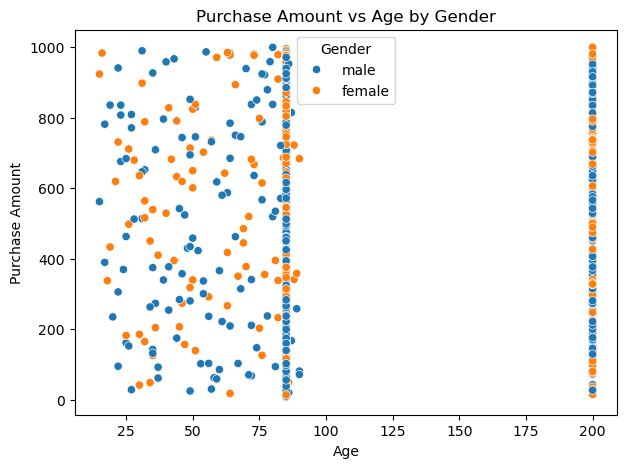

In [49]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Age',y='PurchaseAmount',hue='Gender')
plt.title('Purchase Amount vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

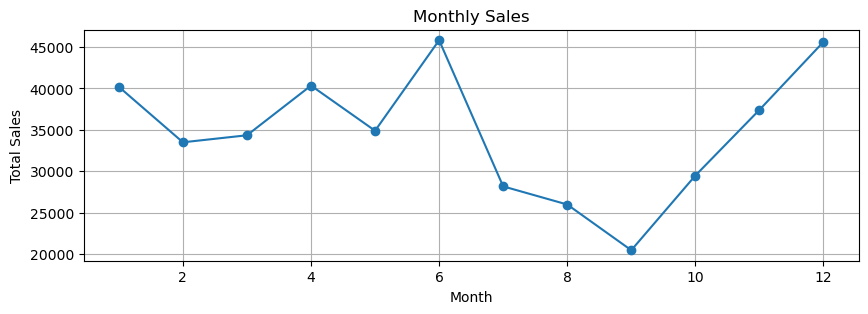

In [47]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])
df['Month']=df['PurchaseDate'].dt.month
df.head()
monthly_sales=df.groupby('Month')['PurchaseAmount'].sum()
monthly_sales.plot(figsize=(10,3),kind='line',marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

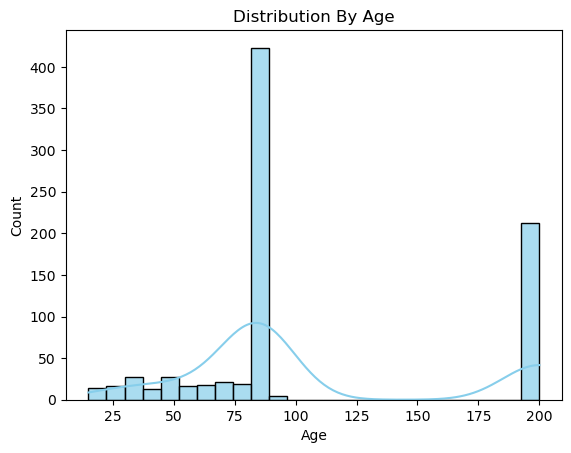

In [35]:
sns.histplot(df['Age'], bins=25, kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution By Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

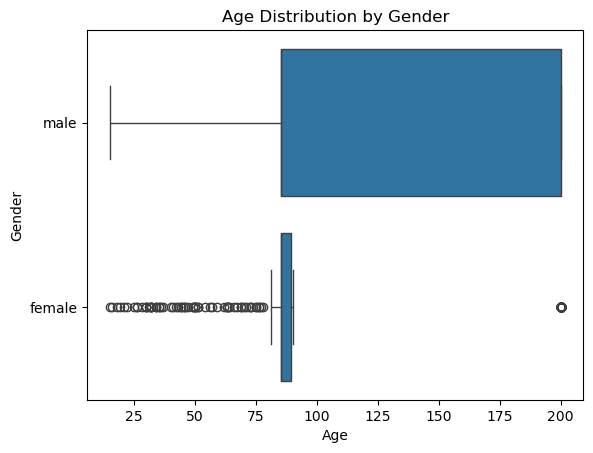

In [48]:
sns.boxplot(data=df,x='Age',y='Gender')
plt.title('Age Distribution by Gender')
plt.show()

In [50]:
df.to_csv('Clean_Data_2025',index=False)